In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set_theme(style="whitegrid")


Class Distribution

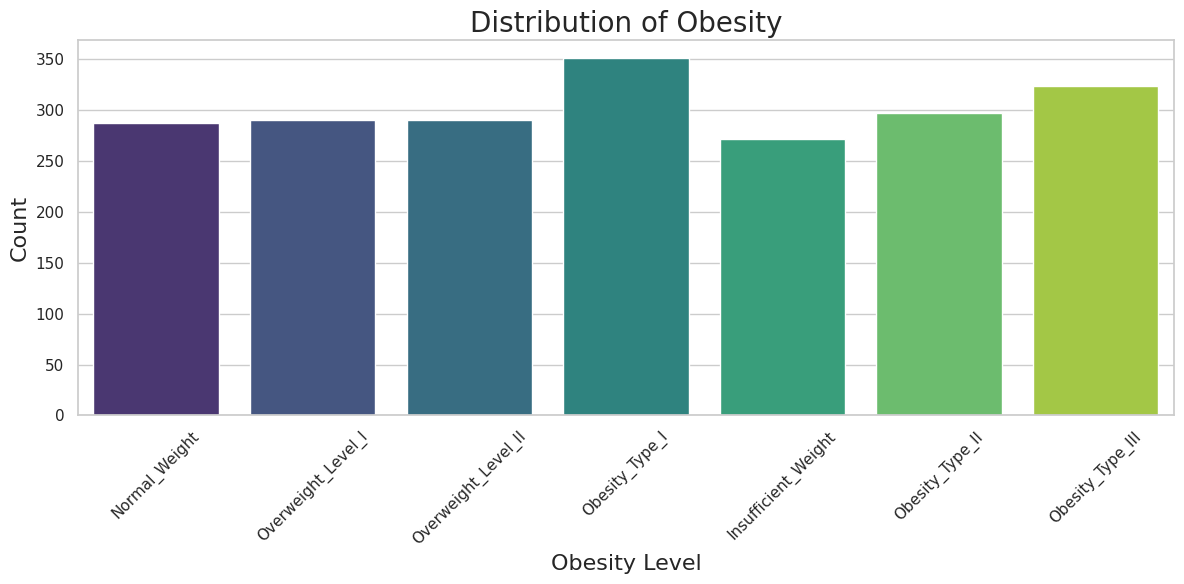

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='NObeyesdad',data=df ,palette='viridis', hue='NObeyesdad')
plt.title('Distribution of Obesity',fontsize=20)
plt.xlabel('Obesity Level',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Histogram (Age Distribution)

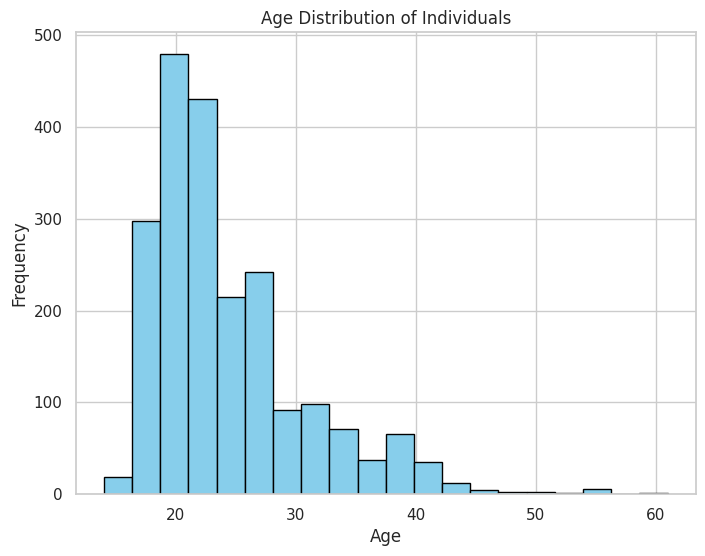

In [6]:
plt.figure(figsize=(8, 6))
df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Correlation Heatmap

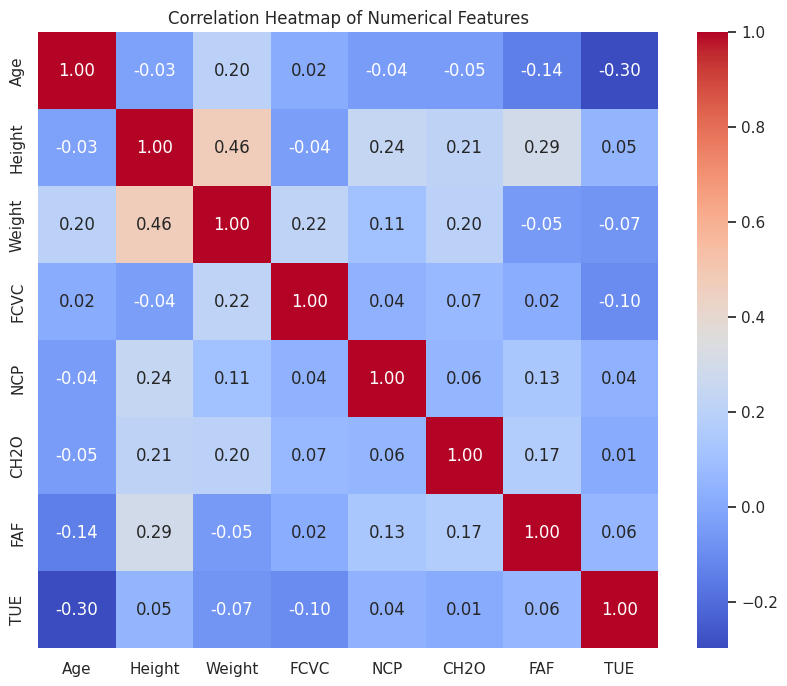

In [7]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Boxplot (Weight)

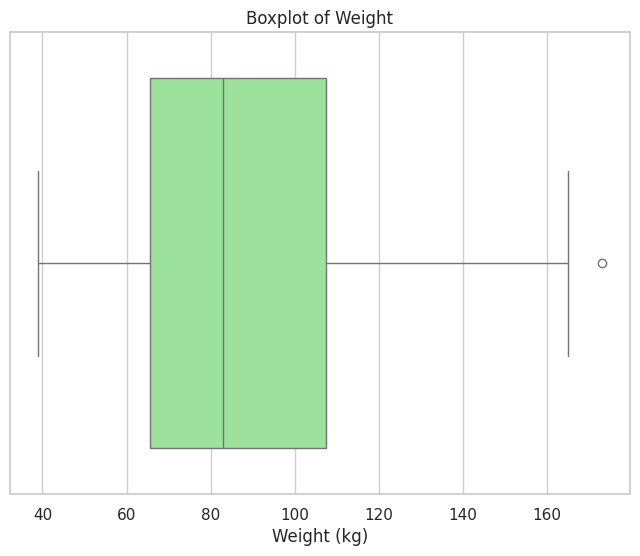

In [8]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Weight'], color='lightgreen')
plt.title('Boxplot of Weight')
plt.xlabel('Weight (kg)')
plt.show()

ScatterPlot 

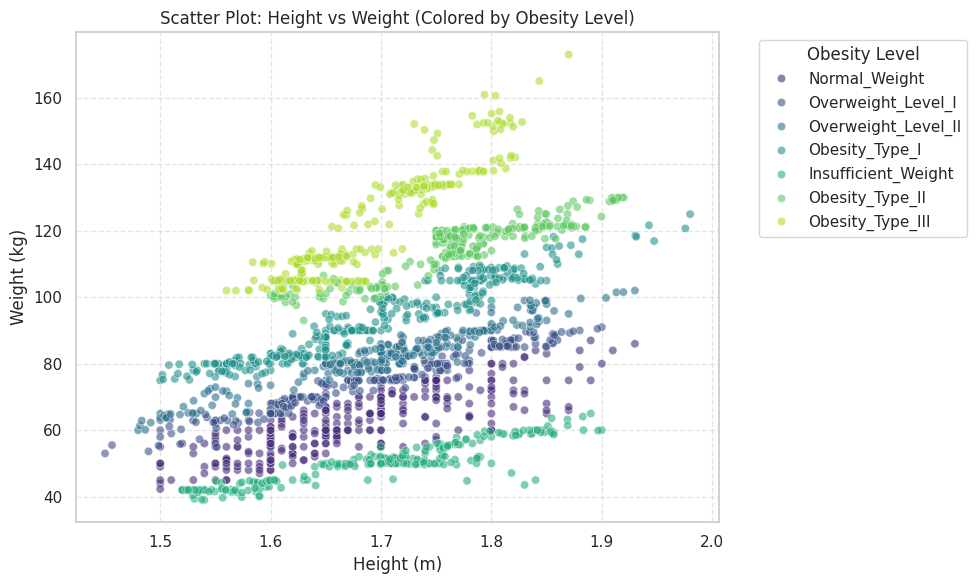

In [9]:


# Generate Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='NObeyesdad', palette='viridis', alpha=0.6)
plt.title('Scatter Plot: Height vs Weight (Colored by Obesity Level)')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Obesity Level')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

In [10]:
df


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


## Logistic Regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [42]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Accuracy: 0.8676122931442081
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        54
           1       0.83      0.69      0.75        58
           2       0.87      0.93      0.90        70
           3       0.95      0.98      0.97        60
           4       1.00      0.98      0.99        65
           5       0.70      0.78      0.74        58
           6       0.80      0.71      0.75        58

    accuracy                           0.87       423
   macro avg       0.87      0.86      0.86       423
weighted avg       0.87      0.87      0.87       423



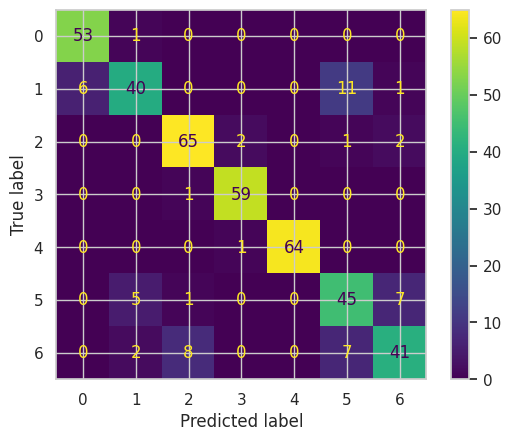

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

lr_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='viridis')

## Decision Tree

Decision Tree Accuracy: 0.91725768321513
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        54
           1       0.78      0.84      0.81        58
           2       0.94      0.93      0.94        70
           3       0.97      0.97      0.97        60
           4       1.00      0.98      0.99        65
           5       0.84      0.88      0.86        58
           6       0.93      0.93      0.93        58

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.92      0.92      0.92       423



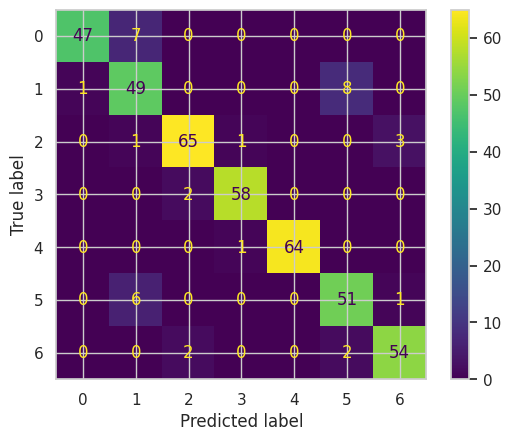

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_params = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
dt_model = dt_grid.best_estimator_
y_pred_dt = dt_model.predict(X_test)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='viridis')

## Random Forest

Random Forest Accuracy: 0.9527186761229315
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.82      0.97      0.89        58
           2       0.97      0.97      0.97        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.94      0.88      0.91        58
           6       0.96      0.95      0.96        58

    accuracy                           0.95       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.95      0.95       423



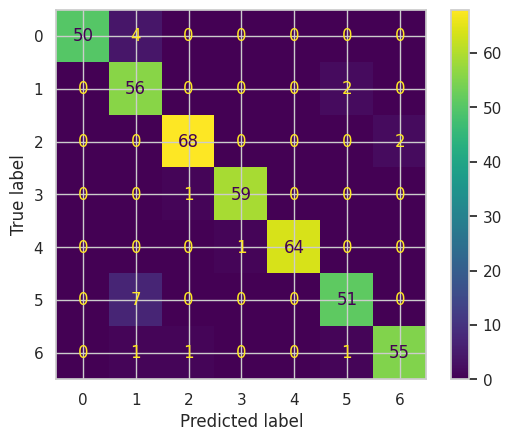

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='viridis')

## SVM

SVM Accuracy: 0.8699763593380615
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.65      0.74      0.69        58
           2       0.90      0.93      0.92        70
           3       0.95      0.95      0.95        60
           4       1.00      0.98      0.99        65
           5       0.80      0.74      0.77        58
           6       0.85      0.79      0.82        58

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.87      0.87      0.87       423



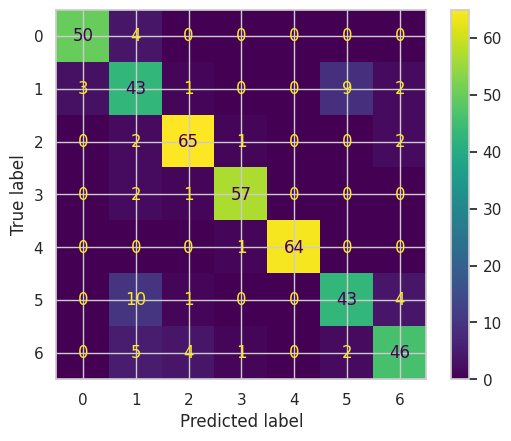

In [37]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, cmap='viridis')

In [ ]:
results = []
model_preds = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}
for name, y_pred in model_preds.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Algorithm": name,
        "Accuracy Score": accuracy_score(y_test, y_pred),
        "Precision (Macro)": report['macro avg']['precision'],
        "Recall (Macro)": report['macro avg']['recall'],
        "F1-Score (Macro)": report['macro avg']['f1-score']
    })

comparison_df = pd.DataFrame(results).sort_values(by="Accuracy Score", ascending=False)
print("\nFinal Comparative Analysis Table:")
print(comparison_df)


Final Comparative Analysis Table:
             Algorithm  Accuracy Score  Precision (Macro)  Recall (Macro)  \
2        Random Forest        0.952719           0.955378        0.951201   
1        Decision Tree        0.917258           0.918963        0.915057   
3                  SVM        0.869976           0.870834        0.866425   
0  Logistic Regression        0.867612           0.865281        0.864345   

   F1-Score (Macro)  
2          0.952096  
1          0.916261  
3          0.867879  
0          0.862683  
